In [1]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

from sklearn import preprocessing

In [2]:
# logistische Regression
LOG_PARAMS = {
    "random_state" : 0,
    "max_iter" : 500,
    "n_jobs" : -1
}

In [3]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [4]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
bureau = pd.read_csv(DATASET_DIR / "4. FillNA" / "bureau.csv")
pa_pos = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_pos.csv")
pa_ip = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_ip.csv")
pa_cc = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_cc.csv")

In [5]:
app_train = app_train.set_index("SK_ID_CURR")
bureau = bureau.set_index("SK_ID_CURR")
pa_pos = pa_pos.set_index("SK_ID_CURR")
pa_ip = pa_ip.set_index("SK_ID_CURR")
pa_cc = pa_cc.set_index("SK_ID_CURR")

In [6]:
MODEL_APPLICATION = "1.1. Esembler_Logistic_application.json"
MODEL_BUREAU = "1.2. Esembler_Logistic_bureau.json"
MODEL_PA_POS = "1.3. Esembler_Logistic_pa_pos.json"
MODEL_PA_IP = "1.4. Esembler_Logistic_pa_ip.json"
MODEL_PA_CC = "1.5. Esembler_Logistic_pa_cc.json"

In [7]:
with open(DATASET_DIR / "Models" / MODEL_APPLICATION, 'r') as file:
    model_application_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_BUREAU, 'r') as file:
    model_bureau_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_POS, 'r') as file:
    model_pa_pos_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_IP, 'r') as file:
    model_pa_ip_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_CC, 'r') as file:
    model_pa_cc_data = json.load(file)

In [8]:
print(len(model_application_data["keep"]))
print(len(model_bureau_data["keep"]))
print(len(model_pa_pos_data["keep"]))
print(len(model_pa_ip_data["keep"]))
print(len(model_pa_cc_data["keep"]))

29
6
20
24
22


In [9]:
model_application = LogisticRegression(**LOG_PARAMS)
model_bureau = LogisticRegression(**LOG_PARAMS)
model_pa_pos = LogisticRegression(**LOG_PARAMS)
model_pa_ip = LogisticRegression(**LOG_PARAMS)
model_pa_cc = LogisticRegression(**LOG_PARAMS)

In [10]:
df = app_train[["TARGET"]]
df.head()

,TARGET
SK_ID_CURR,
100002,1.0
100003,0.0
100004,0.0
100006,0.0
100007,0.0


In [11]:
# application prediction

In [12]:
# skalierung der app_train daten

x = app_train[model_application_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

x.head()

,A_EXT_SOURCE_1,A_DAYS_BIRTH,A_EXT_SOURCE_3,A_LANDAREA_AVG,A_EXT_SOURCE_2,A_TOTALAREA_MODE,A_AMT_CREDIT,A_AMT_ANNUITY,A_CREDIT/INCOME,A_CODE_GENDER,A_DAYS_EMPLOYED,A_FLAG_DOCUMENT_3,A_REGION_POPULATION_RELATIVE,A_BASEMENTAREA_AVG,A_REGION_RATING_CLIENT,A_YEARS_BEGINEXPLUATATION_AVG,A_ORGANIZATION_TYPE,A_FLAG_EMP_PHONE,A_DEF_60_CNT_SOCIAL_CIRCLE,A_NAME_INCOME_TYPE,A_AMT_INCOME_TOTAL,A_AMT_REQ_CREDIT_BUREAU_QRT,A_DAYS_ID_PUBLISH,A_AMT_REQ_CREDIT_BUREAU_DAY,A_AMT_REQ_CREDIT_BUREAU_HOUR,A_AMT_REQ_CREDIT_BUREAU_MON,A_AMT_REQ_CREDIT_BUREAU_YEAR,A_OBS_60_CNT_SOCIAL_CIRCLE,A_OCCUPATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,-2.381600,1.506880,-2.081804,-0.546229,-1.317275,-1.123316,-0.486449,-0.150977,-0.768301,-1.388135,0.976145,0.639065,-0.149452,-0.913527,-0.103064,-1.645075,-0.880189,0.468697,5.253078,-0.889689,0.477100,-0.358336,0.493636,-0.067833,-0.082499,-0.309534,-0.513659,0.250550,-0.595378
100003,-1.174945,-0.166821,-0.925030,-1.130976,0.565018,-0.294048,1.839008,0.686349,0.367610,0.720307,0.703365,0.639065,-1.252750,-0.558134,-2.067573,0.581163,-0.787990,0.468697,-0.276473,-0.063874,1.327729,-0.358336,1.841007,-0.067833,-0.082499,-0.309534,-1.087507,-0.170345,-0.334305
100004,0.091593,-0.689509,1.240933,0.202538,0.217508,-0.040886,-1.198575,-1.517626,-0.771521,-1.388135,1.180111,-1.564786,-0.783451,-0.067049,-0.103064,-0.011309,-0.695790,0.468697,-0.276473,-0.889689,-1.224157,-0.358336,0.190864,-0.067833,-0.082499,-0.309534,-1.087507,-0.591239,-0.595378
100006,0.700737,-0.680114,0.319486,0.229300,0.712731,-0.136830,-0.732693,0.228629,-0.642468,0.720307,-0.212998,0.639065,-0.928991,-0.028703,-0.103064,-0.343233,-0.880189,0.468697,-0.276473,-0.889689,-0.373528,-0.019288,0.260111,-0.012958,0.020951,-0.058932,0.184887,0.250550,-0.595378
100007,0.138093,-0.892535,0.350409,-0.251697,-1.004047,-0.223103,-0.207463,-0.366817,0.135548,-1.388135,-0.212503,-1.564786,0.563570,-0.155149,-0.103064,0.050158,-0.603590,0.468697,-0.276473,-0.889689,-0.543654,-0.358336,-0.492030,-0.067833,-0.082499,-0.309534,-1.087507,-0.591239,-0.334305


In [13]:
y = app_train.loc[app_train.index]["TARGET"]
y.head()

SK_ID_CURR
100002    1.0
100003    0.0
100004    0.0
100006    0.0
100007    0.0
Name: TARGET, dtype: float64

In [14]:
model_application.fit(x,y)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=0)

In [15]:
predicted = pd.DataFrame(model_application.predict_proba(x), index=app_train.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

In [16]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT
SK_ID_CURR,,,
100002,1.0,0.393967,0.606033
100003,0.0,0.673545,0.326455
100004,0.0,0.970079,0.029921
100006,0.0,0.966114,0.033886
100007,0.0,0.928050,0.071950


In [17]:
# bureau prediction

In [18]:
# skalierung der bureau daten

x = bureau[model_bureau_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

x.head()

,B_Closed,B_Active,B_CREDIT_DAY_OVERDUE,B_AMT_CREDIT_SUM_OVERDUE,B_DAYS_CREDIT_ENDDATE,B_AMT_ANNUITY
SK_ID_CURR,,,,,,
100002,0.744324,-0.031708,-0.037283,-0.038010,-0.505148,-0.353952
100003,-0.142824,-0.591045,-0.037283,-0.038010,-0.189633,-0.353952
100004,-0.438540,-1.150382,-0.027373,-0.027024,-0.204889,-0.197708
100007,-0.734255,-1.150382,-0.024686,-0.024640,-0.207808,-0.203460
100008,-0.438540,-0.591045,-0.037283,-0.038010,-0.448793,-0.353952


In [19]:
y = app_train.loc[bureau.index]["TARGET"]
y.head()

SK_ID_CURR
100002    1.0
100003    0.0
100004    0.0
100007    0.0
100008    0.0
Name: TARGET, dtype: float64

In [20]:
model_bureau.fit(x,y)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=0)

In [21]:
predicted = pd.DataFrame(model_bureau.predict_proba(x), index=bureau.index)
predicted.columns = ["B_PAYBACK", "B_DEFAULT"]

In [22]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT
SK_ID_CURR,,,,,
100002,1.0,0.393967,0.606033,0.939830,0.060170
100003,0.0,0.673545,0.326455,0.935592,0.064408
100004,0.0,0.970079,0.029921,0.940735,0.059265
100006,0.0,0.966114,0.033886,NaN,NaN
100007,0.0,0.928050,0.071950,0.936329,0.063671


In [23]:
# pa_pos prediction

In [24]:
# skalierung der pa_pos daten

x = pa_pos[model_pa_pos_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

x.head()

,PA_AMT_CREDIT,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_GOODS_PRICE,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CREDITS,PA_POS_CNT_PAYMENTS_LEFT,PA_AMT_DOWN_PAYMENT,PA_CNT_PRODUCT_COMBINATION_POS industry with interest,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CLIENT_TYPE_New,PA_RATE_DOWN_PAYMENT,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_POS_CNT_DPD,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_CODE_REJECT_REASON_HC
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,
158271,-0.733553,-0.880635,-0.754223,-0.754223,-0.755121,-0.464490,-0.888423,-0.358508,-0.706973,1.100530,-0.543656,0.193456,-0.859450,-0.401357,-0.02179,-0.454386,-0.730497,-0.570431,-0.398699,-0.364585
252457,-0.755663,-0.921701,-0.777095,-0.777095,-0.755121,-0.464490,-0.888423,0.579673,-0.706715,-0.450537,0.445605,-1.622381,-0.858975,-0.401357,-0.02179,1.846507,-0.730497,0.807182,0.513013,-0.364585
260094,3.215517,1.703671,3.038075,3.038075,2.084320,0.085391,3.337410,6.938455,-0.177310,-0.450537,-0.543656,0.193456,0.817767,3.777147,-0.02179,0.696060,1.564739,-0.570431,0.513013,0.360072
176456,-0.635815,-0.645784,-0.629558,-0.629558,-0.755121,-0.464490,-0.888423,-0.358508,0.039272,1.100530,-0.543656,0.193456,-0.315314,-0.401357,-0.02179,-0.454386,-0.730497,-0.570431,-0.398699,-0.364585
256657,1.413796,0.638120,1.285968,1.285968,-0.755121,3.384675,0.168035,2.560277,4.049462,-0.450537,1.434866,0.193456,2.894375,-0.401357,-0.02179,-0.454386,0.799660,2.184795,4.159864,3.258700


In [25]:
y = app_train.loc[pa_pos.index]["TARGET"]
y.head()

SK_ID_CURR
158271    0.0
252457    0.0
260094    0.0
176456    0.0
256657    0.0
Name: TARGET, dtype: float64

In [26]:
model_pa_pos.fit(x,y)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=0)

In [27]:
predicted = pd.DataFrame(model_pa_pos.predict_proba(x), index=pa_pos.index)
predicted.columns = ["PA_POS_PAYBACK", "PA_POS_DEFAULT"]

In [28]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT
SK_ID_CURR,,,,,,,
100002,1.0,0.393967,0.606033,0.939830,0.060170,0.903814,0.096186
100003,0.0,0.673545,0.326455,0.935592,0.064408,0.981392,0.018608
100004,0.0,0.970079,0.029921,0.940735,0.059265,0.914105,0.085895
100006,0.0,0.966114,0.033886,NaN,NaN,0.953858,0.046142
100007,0.0,0.928050,0.071950,0.936329,0.063671,0.921260,0.078740


In [29]:
# pa_ip prediction

In [30]:
# skalierung der pa_ip daten

x = pa_ip[model_pa_ip_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

x.head()

,PA_AMT_ANNUITY,PA_AMT_CREDIT,PA_CNT_CREDITS,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_IP_DAYS_DIFF_60,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_PRODUCT_COMBINATION_POS industry with interest,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_AMT_APPLICATION,PA_AMT_DOWN_PAYMENT,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_RATE_DOWN_PAYMENT,PA_IP_DAYS_DIFF_180,PA_IP_DAYS_DIFF_90,PA_IP_PAYMENT_180,PA_IP_DAYS_DIFF_150,PA_IP_PAYMENT_120,PA_IP_PAYMENT_60,PA_IP_PAYMENT_150,PA_IP_DAYS_DIFF_30
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,
252457,-0.961681,-0.847129,-0.585957,-0.493849,-0.796194,0.222186,-0.478727,0.554256,-1.545566,-0.463118,0.391325,1.812330,-0.786819,-0.333597,-0.474589,-0.379502,0.687524,-0.557542,-1.109739,0.687827,1.357379,1.341315,-1.531427,0.514629
256657,1.328310,1.976594,1.020188,3.111433,0.628036,1.120549,-0.335937,1.829833,0.160499,-0.463118,3.749960,-0.458929,1.781799,1.895271,-0.474589,3.014350,0.579465,-0.208372,-1.235844,-0.231151,0.192299,0.270200,0.157325,0.048084
198678,3.911556,1.344507,1.020188,-0.493849,-0.796194,-0.676178,-0.942793,-0.721322,0.160499,-0.463118,-0.448333,-0.458929,1.625042,1.559446,-0.474589,2.633083,0.651504,0.175714,-0.041123,0.723172,-0.143922,-0.038289,-0.150977,-1.040523
394447,-0.328732,-0.658561,1.020188,-0.493849,-0.796194,0.222186,0.092431,0.554256,1.866564,-0.463118,0.391325,-0.458929,-0.560498,-0.334203,-0.474589,-0.380880,0.687524,0.140797,-0.524636,0.086957,-0.520730,0.885916,-0.423699,0.475750
156331,0.903164,0.978110,1.020188,-0.493849,-0.084079,1.120549,0.592195,0.554256,0.160499,-0.463118,-0.448333,-0.458929,1.270193,-0.334203,-0.474589,-0.380880,0.327328,0.629635,0.680024,-0.195806,-1.975117,-0.016883,1.674820,0.514629


In [31]:
y = app_train.loc[pa_ip.index]["TARGET"]
y.head()

SK_ID_CURR
252457    0.0
256657    0.0
198678    0.0
394447    0.0
156331    0.0
Name: TARGET, dtype: float64

In [32]:
model_pa_ip.fit(x,y)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=0)

In [33]:
predicted = pd.DataFrame(model_pa_ip.predict_proba(x), index=pa_ip.index)
predicted.columns = ["PA_IP_PAYBACK", "PA_IP_DEFAULT"]

In [34]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT
SK_ID_CURR,,,,,,,,,
100002,1.0,0.393967,0.606033,0.939830,0.060170,0.903814,0.096186,0.918173,0.081827
100003,0.0,0.673545,0.326455,0.935592,0.064408,0.981392,0.018608,NaN,NaN
100004,0.0,0.970079,0.029921,0.940735,0.059265,0.914105,0.085895,NaN,NaN
100006,0.0,0.966114,0.033886,NaN,NaN,0.953858,0.046142,0.957593,0.042407
100007,0.0,0.928050,0.071950,0.936329,0.063671,0.921260,0.078740,0.902816,0.097184


In [35]:
# pa_cc prediction

In [36]:
# skalierung der pa_cc daten

x = pa_cc[model_pa_cc_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

x.head()

,PA_AMT_ANNUITY,PA_AMT_CREDIT,PA_CC_DPD_30,PA_CC_BALANCE_180,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_NAME_CLIENT_TYPE_New,PA_CC_BALANCE_60,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_PRODUCT_COMBINATION_POS industry with interest,PA_CC_DPD_60,PA_CC_PAYMENT_60,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CC_DPD_180,PA_CC_PAYMENT_90,PA_CNT_CODE_REJECT_REASON_HC,PA_CC_BALANCE_30,PA_CC_PAYMENT_150,PA_CC_BALANCE_150,PA_CNT_NAME_YIELD_GROUP_high
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,
394447,-0.860134,-0.85467,-0.019318,-0.586986,-0.541101,-0.791255,1.648310,2.614891,0.113888,-0.308747,-0.468764,-0.419765,-0.017627,1.665628,-0.430851,-0.028253,-0.847189,-0.431577,-1.364502,-0.436088,-0.821184,-0.803070
361282,-0.860134,-0.85467,-0.019318,-1.588102,-0.541101,-0.110649,1.648310,1.458173,0.113888,-0.308747,-0.468764,-0.419765,-0.017627,1.839851,-0.430851,-0.028253,0.230048,-0.431577,1.303050,0.386206,-2.104929,-0.803070
436351,-0.860134,-0.85467,-0.019318,0.051803,0.838241,3.292383,-1.366744,-0.126565,0.113888,-0.308747,-0.468764,-0.419765,-0.017627,-0.070003,0.634033,-0.028253,-0.087535,1.417999,0.130616,-0.078649,-0.010999,0.442580
181153,-0.860134,-0.85467,-0.019318,0.051803,0.838241,-0.110649,0.140783,-0.126565,0.113888,-0.308747,-0.468764,-0.419765,-0.017627,-0.070003,0.634033,-0.028253,-0.087535,-0.431577,0.130616,-0.078649,-0.010999,1.065405
309691,-0.860134,-0.85467,-0.019318,0.051803,-0.541101,-0.110649,0.140783,-0.126565,0.113888,-0.308747,-0.468764,-0.419765,-0.017627,-0.070003,-0.430851,-0.028253,-0.087535,-0.431577,0.130616,-0.078649,-0.010999,-0.180245


In [37]:
y = app_train.loc[pa_cc.index]["TARGET"]
y.head()

SK_ID_CURR
394447    0.0
361282    0.0
436351    0.0
181153    0.0
309691    0.0
Name: TARGET, dtype: float64

In [38]:
model_pa_cc.fit(x,y)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=0)

In [39]:
predicted = pd.DataFrame(model_pa_cc.predict_proba(x), index=pa_cc.index)
predicted.columns = ["PA_CC_PAYBACK", "PA_CC_DEFAULT"]

In [40]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT,PA_CC_PAYBACK,PA_CC_DEFAULT
SK_ID_CURR,,,,,,,,,,,
100002,1.0,0.393967,0.606033,0.939830,0.060170,0.903814,0.096186,0.918173,0.081827,NaN,NaN
100003,0.0,0.673545,0.326455,0.935592,0.064408,0.981392,0.018608,NaN,NaN,NaN,NaN
100004,0.0,0.970079,0.029921,0.940735,0.059265,0.914105,0.085895,NaN,NaN,NaN,NaN
100006,0.0,0.966114,0.033886,NaN,NaN,0.953858,0.046142,0.957593,0.042407,0.928554,0.071446
100007,0.0,0.928050,0.071950,0.936329,0.063671,0.921260,0.078740,0.902816,0.097184,NaN,NaN


In [41]:
df = df.fillna(0.5)
TEST = df.copy()
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT,PA_CC_PAYBACK,PA_CC_DEFAULT
SK_ID_CURR,,,,,,,,,,,
100002,1.0,0.393967,0.606033,0.939830,0.060170,0.903814,0.096186,0.918173,0.081827,0.500000,0.500000
100003,0.0,0.673545,0.326455,0.935592,0.064408,0.981392,0.018608,0.500000,0.500000,0.500000,0.500000
100004,0.0,0.970079,0.029921,0.940735,0.059265,0.914105,0.085895,0.500000,0.500000,0.500000,0.500000
100006,0.0,0.966114,0.033886,0.500000,0.500000,0.953858,0.046142,0.957593,0.042407,0.928554,0.071446
100007,0.0,0.928050,0.071950,0.936329,0.063671,0.921260,0.078740,0.902816,0.097184,0.500000,0.500000


In [42]:
# finales Modell

In [43]:
model = LogisticRegression(**LOG_PARAMS)

TPRs = []
TNRs = []
Ps = []
NPVs = []
Fs = []
As = []
aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df

y = df["TARGET"]
x = df.drop(["TARGET"], axis=1)

for ID_TRAIN, ID_TEST in kfold.split(data):
    
    x_train = x.iloc[ID_TRAIN]
    y_train = y.iloc[ID_TRAIN]
    x_test = x.iloc[ID_TEST]
    y_test = y.iloc[ID_TEST]
    
    model.fit(x_train, y_train)
    (tn,fp),(fn,tp)=confusion_matrix(y_test, model.predict(x_test))
    
    # TPR
    TPR = R = tp/(tp+fn)
    # TNR
    TNR = tn/(tn+fp)
    # Precision
    P = tp/(tp+fp)
    # NPV
    NPV = tn/(tn+fn)
    # F-Score
    F = 2*P*R/(P+R)
    # Accuracy
    A = (tp+tn)/(tp+tn+fp+fn)
    # AUC
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    
    TPRs.append(TPR)
    TNRs.append(TNR)
    Ps.append(P)
    NPVs.append(NPV)
    Fs.append(F)
    As.append(A)
    aucs.append(auc)
    
    print('TPR: %.4f' % TPR, 'TNR: %.4f' % TNR, 'P: %.4f' % P, 'NPV: %.4f' % NPV, 'F: %.4f' % F, 'Accuracy: %.4f' % A, 'AUC: %.4f' % auc)

print("\n")
print("Durchschnitte:")
print('TPR: %.4f' % np.mean(TPRs), 'TNR: %.4f' % np.mean(TNRs), 'P: %.4f' % np.mean(Ps), 'NPV: %.4f' % np.mean(NPVs), 'F: %.4f' % np.mean(Fs), 'Accuracy: %.4f' % np.mean(As), 'AUC: %.4f' % np.mean(aucs))

TPR: 0.0823 TNR: 0.9921 P: 0.4789 NPV: 0.9248 F: 0.1405 Accuracy: 0.9186 AUC: 0.7851
TPR: 0.0844 TNR: 0.9919 P: 0.4767 NPV: 0.9250 F: 0.1433 Accuracy: 0.9186 AUC: 0.7786
TPR: 0.0826 TNR: 0.9921 P: 0.4754 NPV: 0.9257 F: 0.1408 Accuracy: 0.9194 AUC: 0.7780
TPR: 0.0836 TNR: 0.9922 P: 0.4914 NPV: 0.9228 F: 0.1428 Accuracy: 0.9167 AUC: 0.7798
TPR: 0.0829 TNR: 0.9925 P: 0.4873 NPV: 0.9265 F: 0.1416 Accuracy: 0.9206 AUC: 0.7752


Durchschnitte:
TPR: 0.0831 TNR: 0.9922 P: 0.4819 NPV: 0.9249 F: 0.1418 Accuracy: 0.9188 AUC: 0.7793


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
y = df["TARGET"]
x = df.drop(["TARGET"], axis=1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [47]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=0)

In [48]:
df = pd.DataFrame({"actual":y_test, "predicted": model.predict_proba(x_test)[:,1]})

In [49]:
defaults = df[df["predicted"] > 0.5]
paybacks = df[df["predicted"] < 0.5]

Text(0.5, 1.0, 'Logistische Regression')

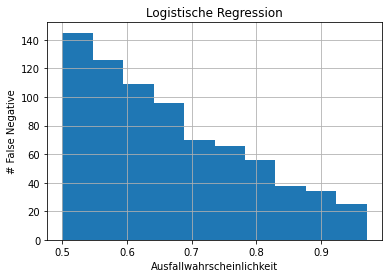

In [61]:
defaults[defaults["actual"] == 0]["predicted"].hist()
plt.xlabel("Ausfallwahrscheinlichkeit")
plt.ylabel("# False Negative")
plt.title("Logistische Regression")

Text(0.5, 1.0, 'Logistische Regression')

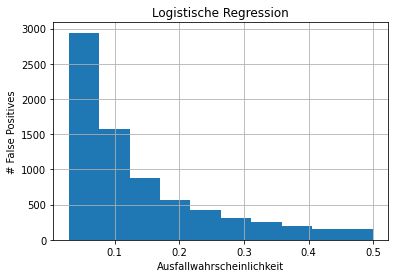

In [62]:
paybacks[paybacks["actual"] == 1]["predicted"].hist()
plt.xlabel("Ausfallwahrscheinlichkeit")
plt.ylabel("# False Positives")
plt.title("Logistische Regression")

In [52]:
# Simulation 25

In [53]:
test = TEST.copy()

In [54]:
simulation = pd.read_csv(DATASET_DIR / "5. Simulation" / "app_train25.csv")

simulation = simulation.set_index("SK_ID_CURR")

# skalierung der app_train daten

x = simulation[model_application_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

predicted = pd.DataFrame(model_application.predict_proba(x), index=app_train.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

test.loc[:,"A_PAYBACK"] = predicted["A_PAYBACK"]
test.loc[:,"A_DEFAULT"] = predicted["A_DEFAULT"]

test = test.drop(["TARGET"],axis=1)

df = pd.DataFrame({"actual":simulation["TARGET"], "predicted": model.predict_proba(test)[:,1]})

(tn,fp),(fn,tp)=confusion_matrix(simulation["TARGET"], model.predict(test))

# TPR
TPR = R = tp/(tp+fn)
print(TPR)
# TNR
TNR = tn/(tn+fp)
print(TNR)
# Precision
P = tp/(tp+fp)
print(P)
# NPV
NPV = tn/(tn+fn)
print(NPV)
# F-Score
F = 2*P*R/(P+R)
print(F)
# Accuracy
A = (tp+tn)/(tp+tn+fp+fn)
print(A)

0.3189500707287683
0.9998632565684
0.9990481816988316
0.765393819731955
0.48353097225641967
0.7885441496401755


In [55]:
# simulation 50

In [56]:
test = TEST.copy()

In [57]:
simulation = pd.read_csv(DATASET_DIR / "5. Simulation" / "app_train50.csv")

simulation = simulation.set_index("SK_ID_CURR")

# skalierung der app_train daten

x = simulation[model_application_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

predicted = pd.DataFrame(model_application.predict_proba(x), index=app_train.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

test.loc[:,"A_PAYBACK"] = predicted["A_PAYBACK"]
test.loc[:,"A_DEFAULT"] = predicted["A_DEFAULT"]

test = test.drop(["TARGET"],axis=1)

df = pd.DataFrame({"actual":simulation["TARGET"], "predicted": model.predict_proba(test)[:,1]})

(tn,fp),(fn,tp)=confusion_matrix(simulation["TARGET"], model.predict(test))

# TPR
TPR = R = tp/(tp+fn)
print(TPR)
# TNR
TNR = tn/(tn+fp)
print(TNR)
# Precision
P = tp/(tp+fp)
print(P)
# NPV
NPV = tn/(tn+fn)
print(NPV)
# F-Score
F = 2*P*R/(P+R)
print(F)
# Accuracy
A = (tp+tn)/(tp+tn+fp+fn)
print(A)

0.0418575255063653
1.0
1.0
0.4703799944769212
0.08035172656841277
0.4823567287023879


In [58]:
# simulation 75

In [59]:
test = TEST.copy()

In [60]:
simulation = pd.read_csv(DATASET_DIR / "5. Simulation" / "app_train75.csv")

simulation = simulation.set_index("SK_ID_CURR")

# skalierung der app_train daten

x = simulation[model_application_data["keep"]]

x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx

predicted = pd.DataFrame(model_application.predict_proba(x), index=app_train.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

test.loc[:,"A_PAYBACK"] = predicted["A_PAYBACK"]
test.loc[:,"A_DEFAULT"] = predicted["A_DEFAULT"]

test = test.drop(["TARGET"],axis=1)

df = pd.DataFrame({"actual":simulation["TARGET"], "predicted": model.predict_proba(test)[:,1]})

(tn,fp),(fn,tp)=confusion_matrix(simulation["TARGET"], model.predict(test))

# TPR
TPR = R = tp/(tp+fn)
print(TPR)
# TNR
TNR = tn/(tn+fp)
print(TNR)
# Precision
P = tp/(tp+fp)
print(P)
# NPV
NPV = tn/(tn+fn)
print(NPV)
# F-Score
F = 2*P*R/(P+R)
print(F)
# Accuracy
A = (tp+tn)/(tp+tn+fp+fn)
print(A)

0.0020565704681548298
1.0
1.0
0.230304471311689
0.004104699332881002
0.2315234251782863
